In [ ]:
from google.colab import files
import pandas as pd
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

Saving test_data_ECG.csv to test_data_ECG.csv


Сформируйте столбец ECG_TIME_DATE, в котором объедение время, указанное в толбце eeg_time и eeg_date

In [ ]:
import pandas as pd
data = pd.read_csv('test_data_ECG.csv')
data.columns = data.columns.str.strip()
data['ECG_TIME_DATE'] = data['eeg_date'] + ' ' + data['eeg_time']

Оформите график количества проведенных исследований Count_subj ЭКГ по годам

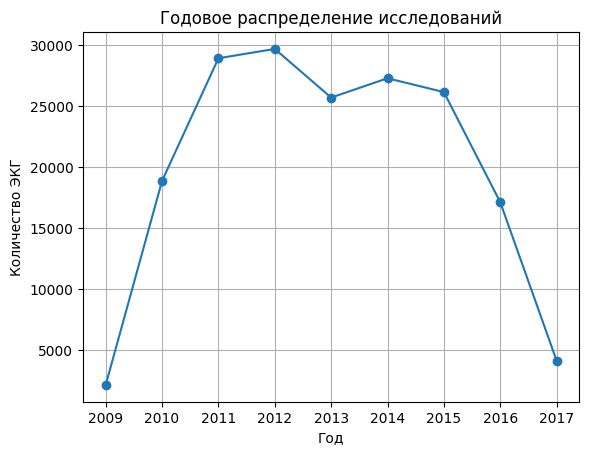

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('test_data_ECG.csv').rename(columns=lambda x: x.strip())
data['Year'] = pd.to_datetime(data['eeg_date'], errors='coerce', dayfirst=True).dt.year
ecg_counts_by_year = data.groupby('Year')['Count_subj'].sum().reset_index()

fig, ax = plt.subplots()
ax.plot(ecg_counts_by_year['Year'], ecg_counts_by_year['Count_subj'], marker='o', linestyle='-')
ax.set(xlabel='Год', ylabel='Количество ЭКГ', title='Годовое распределение исследований')
ax.grid(True)
plt.show()

Постройте scatter_plot показывающей распеределение классов 0,1 (больной, здоровый) по двум параметрам: t_end, t_axis.
Какие выводы можно сделать из получившегося графика?

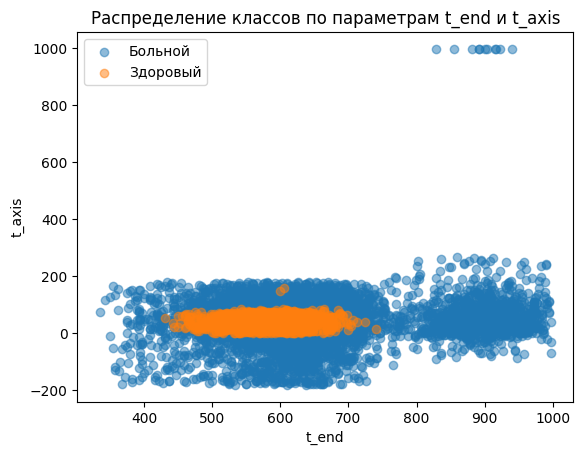

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data_filtered = data[(data['t_end'] < 1000) & (data['t_axis'] < 1000)]
class_0 = data_filtered[data_filtered['Healthy_Status'] == 0]
class_1 = data_filtered[data_filtered['Healthy_Status'] == 1]
plt.scatter(class_0['t_end'], class_0['t_axis'], label='Больной', alpha=0.5)
plt.scatter(class_1['t_end'], class_1['t_axis'], label='Здоровый', alpha=0.5)
plt.xlabel('t_end')
plt.ylabel('t_axis')
plt.legend()
plt.title('Распределение классов по параметрам t_end и t_axis')
plt.show()

**Основная задача**

При помощи простейшей модели нейросети (см. семинар №2), научиться определять больного и здорового пациента.
Для выполнения данной задачи не все данные в датасете подойдут.
Для определения классов использовать столбец Healthy_Status.
Для определения параметров столбцы: rr_interval, pp_onset, p_end, qrs_onset, qrs_end, t_end, p_axis, qrs_axis, t_axis

In [ ]:
import torch;
import torch.nn as nn;
from sklearn.model_selection import train_test_split;
from sklearn.preprocessing import MinMaxScaler

data_clean = data.dropna(subset=['rr_interval', 'p_onset', 'p_end', 'qrs_onset', 'qrs_end', 't_end', 'p_axis', 'qrs_axis', 't_axis', 'Healthy_Status'])
X, y = data_clean[['rr_interval', 'p_onset', 'p_end', 'qrs_onset', 'qrs_end', 't_end', 'p_axis', 'qrs_axis', 't_axis']].values, data_clean['Healthy_Status'].values

X_train, X_test, y_train, y_test = train_test_split(MinMaxScaler().fit_transform(X), y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = map(torch.FloatTensor, [X_train, X_test, y_train, y_test])

net = nn.Sequential(nn.Linear(9, 12), nn.ReLU(), nn.Linear(12, 4), nn.ReLU(), nn.Linear(4, 2))
loss_func, optimizer = nn.CrossEntropyLoss(), torch.optim.Adam(net.parameters(), lr=0.01)

for epoch in range(40):
    optimizer.zero_grad(); loss = loss_func(net(X_train), y_train.long()); loss.backward(); optimizer.step()

print(f'Accuracy: {(net(X_test).argmax(1) == y_test).float().mean().item() * 100:.2f}%')

Accuracy: 79.30%


После обучения модели добавьте столбец filtering к параметрам, на сколько изменилось качество?

In [ ]:
# Ничего значимо не поменялось